# カイ２乗分布

カイ２乗分布とは、標準正規分布から任意の数だけサンプルを取り、それぞれを２乗して合計した値を別のグラフにプロットした時に現れる分布のこと。

特徴として、サンプルする数（自由度と呼ぶ）が少ない時は左側に山、右側に尻尾が出来る。また、二乗するので正の値しかない。

### なぜこのような形になる？

標準正規分布からのサンプル数が少ない時は、正規分布では0付近が山になっていて（つまりデータが多い）、0付近のデータがサンプルされやすく、0付近のデータの二乗も0に近いので、カイ２乗分布のグラフでも0付近に２乗和の結果が集中する。これは同時に、0よりも離れた極端に小さいマイナスやプラスの値のデータがサンプルされにくいので、カイ２乗分布でも、右端の方に２乗和の結果が現れることが少ないということ。

自由度=3の時にどのようにサンプルデータの二乗和が求められるかを可視化したのが下のアニメーション。
２乗することを「正方形」で表し、それらの合計も正方形で表している。右側のグラフに、二乗和がどのあたりのデータとしてプロットされるかを示しています。自由度=3の場合は、左端に多くが出現しているのが分かります。

<img src="img/chi2_animation.gif" alt="Description of GIF" style="width:900px;"/>


## 異なる自由度でのカイ２乗分布

自由度を小さい値から大きいものに変えて、その効果を可視化してみる。自由度は3, 7, 12, 20。
赤い曲線は理論値で、オレンジ色のバーは実際にサンプリングして得た２乗和の値。


**自由度=3の場合**

<img src="img/chi2_animation_df_3.gif" alt="Description of GIF" style="width:900px;"/>

**自由度=7の場合**

<img src="img/chi2_animation_df_7.gif" alt="Description of GIF" style="width:900px;"/>

**自由度=12の場合**

<img src="img/chi2_animation_df_12.gif" alt="Description of GIF" style="width:900px;"/>

**自由度=20の場合**

<img src="img/chi2_animation_df_20.gif" alt="Description of GIF" style="width:900px;"/>

In [ ]:
pip install japanize-matplotlib

GIFとして保存しました: chi2_animation.gif


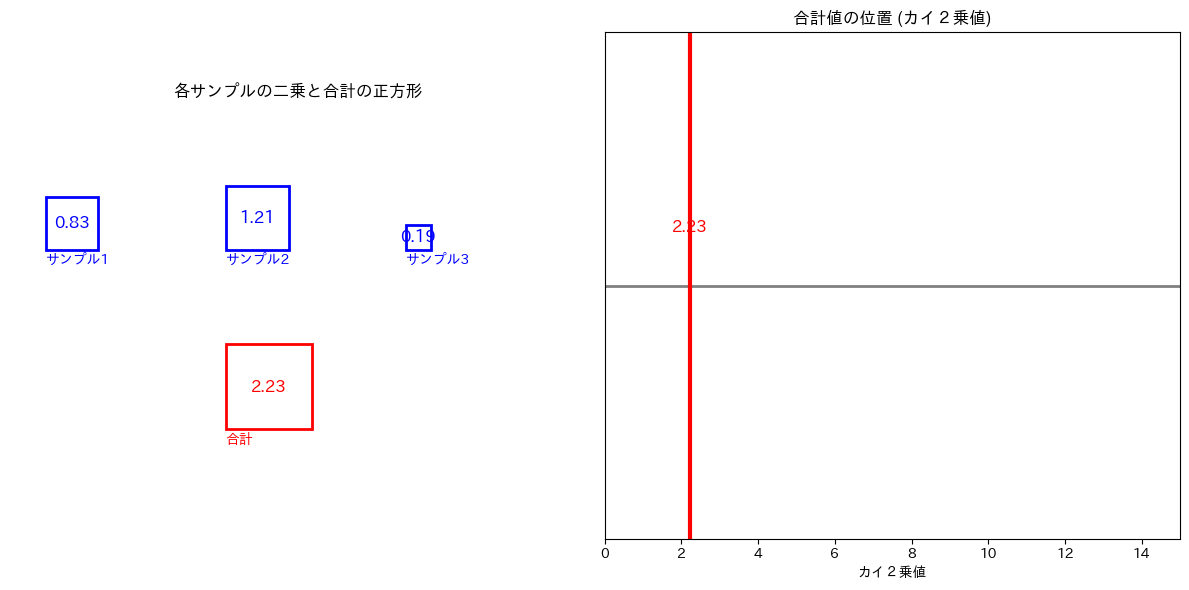

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Rectangle

def animate_chi_square_visualization(df=3, num_frames=50, scale=0.8, x_axis_limit=15, gif_filename="chi2_animation.gif"):
    """
    自由度 df の場合に、標準正規乱数からサンプルした各値の二乗を
    正方形として描画し、さらにその合計値を別の正方形として表示するアニメーションを作成し、GIFとして保存する。
    """
    # 図を左右のパネルに分割
    fig, (ax_left, ax_right) = plt.subplots(1, 2, figsize=(12, 6))
    
    # 初期設定
    ax_left.set_xlim(0, 8)
    ax_left.set_ylim(0, 5)
    ax_left.set_title("各サンプルの二乗と合計の正方形")
    ax_left.axis('off')  # 軸は非表示
    ax_left.set_aspect('equal', adjustable='box')  # 正方形のためにアスペクト比を equal に設定
    
    ax_right.set_xlim(0, x_axis_limit)
    ax_right.set_ylim(0, 1)
    ax_right.set_title("合計値の位置 (カイ２乗値)")
    ax_right.set_xlabel("カイ２乗値")
    ax_right.get_yaxis().set_visible(False)
    ax_right.axhline(0.5, color='gray', lw=2)  # 中央の水平線
    
    # 個々の正方形の配置（df=3 の場合の例）
    positions = [(0.5, 3), (3, 3), (5.5, 3)]  # 各正方形の左下の座標
    # 合計正方形の配置
    sum_position = (3, 0.5)
    
    def update(frame):
        # 両パネルのクリア
        ax_left.cla()
        ax_right.cla()
        
        # 左パネルの基本設定
        ax_left.set_xlim(0, 8)
        ax_left.set_ylim(0, 5)
        ax_left.set_title("各サンプルの二乗と合計の正方形")
        ax_left.axis('off')
        ax_left.set_aspect('equal', adjustable='box')  # アスペクト比 equal を再設定
        
        # 右パネルの基本設定
        ax_right.set_xlim(0, x_axis_limit)
        ax_right.set_ylim(0, 1)
        ax_right.set_title("合計値の位置 (カイ２乗値)")
        ax_right.set_xlabel("カイ２乗値")
        ax_right.get_yaxis().set_visible(False)
        ax_right.axhline(0.5, color='gray', lw=2)
        
        # 標準正規分布から df 個のサンプルを生成し、その二乗値を計算
        samples = np.random.normal(0, 1, df)
        squares = samples**2  # 各サンプルの二乗値
        chi2_value = np.sum(squares)  # 合計（カイ２乗値）
        
        # 左パネル：各サンプルの正方形（青色）の描画
        for i, (pos, val) in enumerate(zip(positions, squares)):
            side = scale * np.sqrt(val)
            rect = Rectangle(pos, side, side, edgecolor='blue', facecolor='none', lw=2)
            ax_left.add_patch(rect)
            ax_left.text(pos[0] + side/2, pos[1] + side/2, f"{val:.2f}", color='blue',
                         ha='center', va='center', fontsize=12)
            ax_left.text(pos[0], pos[1] - 0.2, f"サンプル{i+1}", color='blue', fontsize=10)
        
        # 左パネル：合計正方形（赤色）の描画
        side_sum = scale * np.sqrt(chi2_value)
        rect_sum = Rectangle(sum_position, side_sum, side_sum, edgecolor='red', facecolor='none', lw=2)
        ax_left.add_patch(rect_sum)
        ax_left.text(sum_position[0] + side_sum/2, sum_position[1] + side_sum/2, f"{chi2_value:.2f}",
                     color='red', ha='center', va='center', fontsize=12)
        ax_left.text(sum_position[0], sum_position[1] - 0.2, "合計", color='red', fontsize=10)
        
        # 右パネル：x 軸上に合計値の位置を示す
        ax_right.axvline(chi2_value, color='red', lw=3)
        ax_right.text(chi2_value, 0.6, f"{chi2_value:.2f}", color='red',
                      ha='center', va='bottom', fontsize=12)
        
        return []
    
    ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=500, repeat=True)
    plt.tight_layout()
    
    # GIFとして保存（PillowWriter を利用）
    writer = animation.PillowWriter(fps=2)
    ani.save(gif_filename, writer=writer)
    print(f"GIFとして保存しました: {gif_filename}")
    
    plt.show()
    return ani  # 変数に保持してガベージコレクションを防ぐ

anim = animate_chi_square_visualization(df=3, num_frames=50, scale=0.8, x_axis_limit=15, gif_filename="chi2_animation.gif")
